In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


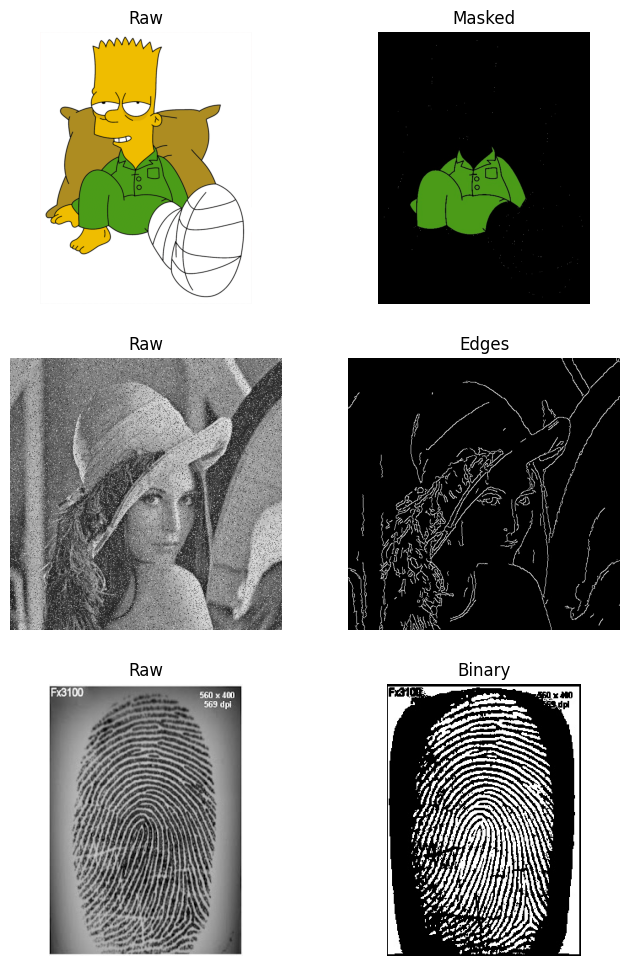

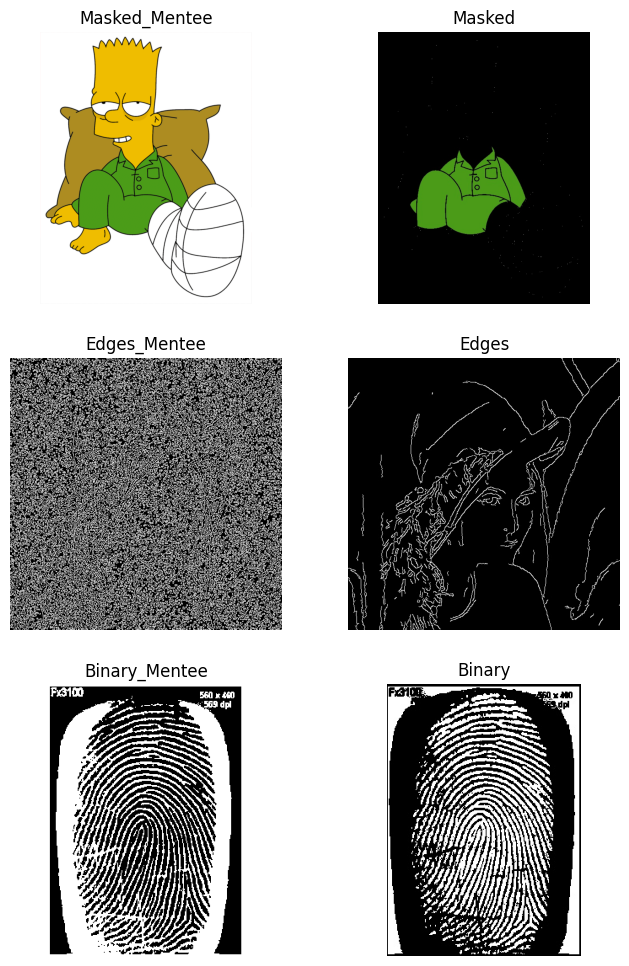

In [ ]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
zip_file_path = '/content/images.zip'
extraction_dir = '/content/'


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)
cartoon_path = os.path.join(extraction_dir, 'cartoon.bmp')
cartoon_y_path = os.path.join(extraction_dir, 'cartoon_y.jpg')
girl_path = os.path.join(extraction_dir, 'girl.png')  # Grayscale image
girl_y_path = os.path.join(extraction_dir, 'girl_y.jpg')
fingerprint_path = os.path.join(extraction_dir, 'fingerprint.jpg')
fingerprint_y_path = os.path.join(extraction_dir, 'fingerprint_y.jpg')


cartoon = cv2.imread(cartoon_path)
cartoon_y = cv2.imread(cartoon_y_path)
girl = cv2.imread(girl_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
girl_y = cv2.imread(girl_y_path)
fingerprint = cv2.imread(fingerprint_path)
fingerprint_y = cv2.imread(fingerprint_y_path)


fig, axs = plt.subplots(3, 2, figsize=(8, 12))
axs[0, 0].imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
axs[0, 1].imshow(cartoon_y)
axs[0, 0].axis("off")
axs[0, 1].axis("off")
axs[0, 0].set_title("Raw")
axs[0, 1].set_title("Masked")
axs[1, 0].imshow(girl, cmap='gray')
axs[1, 1].imshow(girl_y)
axs[1, 0].axis("off")
axs[1, 1].axis("off")
axs[1, 0].set_title("Raw")
axs[1, 1].set_title("Edges")
axs[2, 0].imshow(cv2.cvtColor(fingerprint, cv2.COLOR_BGR2RGB))
axs[2, 1].imshow(fingerprint_y)
axs[2, 0].axis("off")
axs[2, 1].axis("off")
axs[2, 0].set_title("Raw")
axs[2, 1].set_title("Binary")
plt.show()

# START CODE HERE (Do all your processing here)n
cartoon_y_mentee = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)  # Just an example of RGB conversion

# Process girl image to detect edges
girl_y_mentee = cv2.Canny(girl, 100, 200)  # Edge detection

# Process fingerprint image to create a binary version
gray_fingerprint = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
_, fingerprint_y_mentee = cv2.threshold(gray_fingerprint, 127, 255, cv2.THRESH_BINARY)

# END CODE HERE (the final processed image should be cartoon_y_mentee)

# Display processed images
fig, axs1 = plt.subplots(3, 2, figsize=(8, 12))
axs1[0, 0].imshow(cartoon_y_mentee)
axs1[0, 1].imshow(cartoon_y)
axs1[0, 0].axis("off")
axs1[0, 1].axis("off")
axs1[0, 0].set_title("Masked_Mentee")
axs1[0, 1].set_title("Masked")
axs1[1, 0].imshow(girl_y_mentee, cmap="gray")
axs1[1, 1].imshow(girl_y)
axs1[1, 0].axis("off")
axs1[1, 1].axis("off")
axs1[1, 0].set_title("Edges_Mentee")
axs1[1, 1].set_title("Edges")
axs1[2, 0].imshow(fingerprint_y_mentee, cmap="gray")
axs1[2, 1].imshow(fingerprint_y)
axs1[2, 0].axis("off")
axs1[2, 1].axis("off")
axs1[2, 0].set_title("Binary_Mentee")
axs1[2, 1].set_title("Binary")
plt.show()



Found 1658 files belonging to 6 classes.


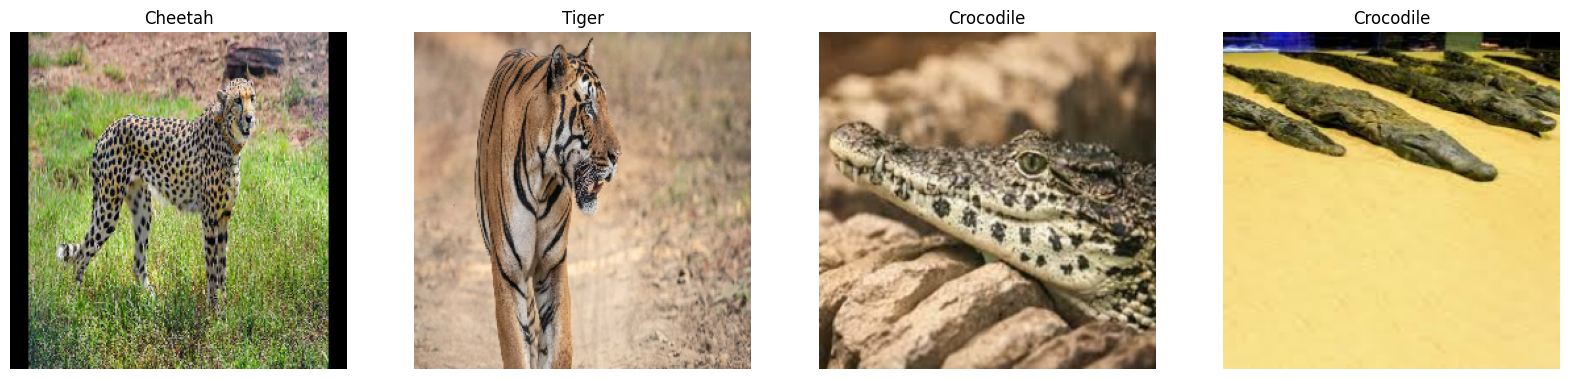

Epoch 1/10
42/42 [==============================] - 231s 5s/step - loss: 1.5787 - accuracy: 0.3601 - val_loss: 1.1996 - val_accuracy: 0.5223
Epoch 2/10
42/42 [==============================] - 217s 5s/step - loss: 1.0519 - accuracy: 0.5595 - val_loss: 0.9794 - val_accuracy: 0.6083
Epoch 3/10
42/42 [==============================] - 271s 6s/step - loss: 0.7853 - accuracy: 0.6949 - val_loss: 0.7008 - val_accuracy: 0.7261
Epoch 4/10
42/42 [==============================] - 230s 5s/step - loss: 0.5557 - accuracy: 0.7887 - val_loss: 0.7844 - val_accuracy: 0.7134
Epoch 5/10
42/42 [==============================] - 226s 5s/step - loss: 0.4189 - accuracy: 0.8542 - val_loss: 0.5471 - val_accuracy: 0.7994
Epoch 6/10
 5/42 [==>...........................] - ETA: 2:53 - loss: 0.2480 - accuracy: 0.9062

KeyboardInterrupt: 

In [6]:
import zipfile
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

zip_file_path = '/content/drive/MyDrive/animals.zip'
extraction_dir = '/content/'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Load data from the extracted directory
def load_data(directory, image_size=(256, 256), batch_size=32):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(directory,image_size=image_size,batch_size=batch_size)
    return dataset

# Load the dataset
data = load_data(extraction_dir)
class_names = data.class_names

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Plot images and labels
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])  # Use class names for titles
    ax[idx].axis('off')  # Hide axes

plt.show()

# encoding and normalizing data
def process_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    label = tf.one_hot(label, depth=len(class_names))
    return image, label

data = data.map(process_images)

# Splittin data in tranining and validation
def train_val_split(dataset, val_size=0.2):
    dataset_size = len(dataset)
    val_size = int(dataset_size * val_size)
    train_size = dataset_size - val_size
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size)
    return train_dataset, val_dataset

train_data, val_data = train_val_split(data)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer for classification
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Training the model
history = model.fit(train_data,validation_data=val_data,epochs=5)

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()








Found 3367 files belonging to 6 classes.


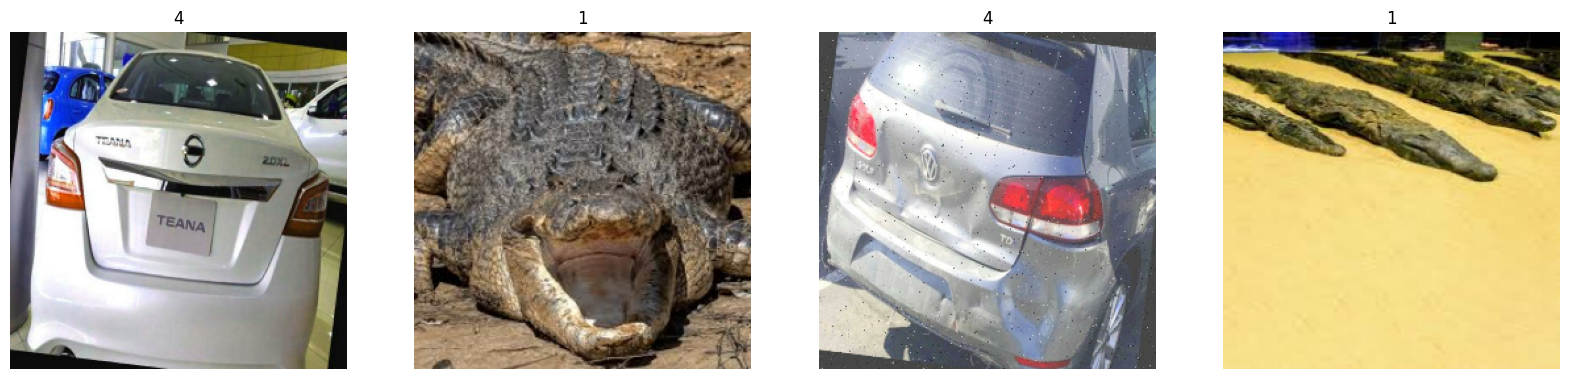

AttributeError: '_MapDataset' object has no attribute 'class_names'

In [ ]:
import zipfile
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/animals.zip'
extraction_dir = '/content/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Load data from the extracted directory
def load_data(directory, image_size=(256, 256), batch_size=32):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=image_size,
        batch_size=batch_size
    )
    return dataset

# Load the dataset
data = load_data(extraction_dir)

# Save class names
class_names = data.class_names

# Create an iterator for the dataset
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Plot images and labels
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])  # Use class names for titles
    ax[idx].axis('off')  # Hide axes

plt.show()

# Normalize the images and one-hot encode the labels
def process_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    label = tf.one_hot(label, depth=len(class_names))  # One-hot encode labels
    return image, label

data = data.map(process_images)

# Split the data into training and validation sets
def train_val_split(dataset, val_size=0.2):
    dataset_size = len(dataset)
    val_size = int(dataset_size * val_size)
    train_size = dataset_size - val_size
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size)
    return train_dataset, val_dataset

train_data, val_data = train_val_split(data)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Set the number of epochs
)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

